In [ ]:
!pip install pylatex


     |████████████████████████████████| 84 kB 2.3 MB/s 
  Created wheel for pylatex: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42813 sha256=70109ba4b8af69508b0d766e274bebea6d13dcdb94a35ada3aca8010e7af0dfc
  Stored in directory: /root/.cache/pip/wheels/4c/62/73/7688c83647b2103ef0c1b783730c8dc50fbbc3667eea6b1cb8
  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8219 sha256=e26c58a557c86113348967d6d34bc96f46959ecc5966a9c3a073e2ef01983471
  Stored in directory: /root/.cache/pip/wheels/73/2b/f6/26e9f84153c25050fe7c09e88f8e32a6be3c7034a38c418319
Successfully built pylatex ordered-set


In [ ]:
from pylatex import Document, Section, Subsection, Command
from pylatex.utils import italic, NoEscape

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# $$Exercise 1$$

In [13]:
Disc_curve = pd.DataFrame({'Term':['1Y','2Y','3Y','4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y'], 
                           'Zero rate':[0.44, 0.56, 0.89, 1.01, 1.12, 1.35, 1.41, 1.45, 1.47, 1.49]})
Disc_curve

,Term,Zero rate
0,1Y,0.44
1,2Y,0.56
2,3Y,0.89
3,4Y,1.01
4,5Y,1.12
5,6Y,1.35
6,7Y,1.41
7,8Y,1.45
8,9Y,1.47
9,10Y,1.49


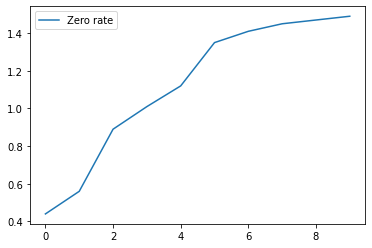

In [14]:
Disc_curve.plot()

## $$Calculate\;bond\;yield$$

In [27]:
YTM_b = ((100-102.4)+(102.4*0.025*7))/102.4/7*100
print('Bond yield to maturity: {:.2f} %'.format(YTM_b))

Bond yield to maturity: 2.17 %


## $$Calculate\;bond\;DV01$$

In [45]:
DV01_b = 0
list = range(1,8)
for i in list:
  DV01_b += i*102.4*0.025*math.exp(-YTM_b*i)
print('Bond DV01: {:.2f}'.format(DV01_b))   

Bond DV01: 0.37


## $$Calculate\;swap\;DV01$$

In [50]:
DV01_s = 0
list = range(1,8)
for i in list:
  DV01_s += Disc_curve['Zero rate'][i-1]
print('Swap DV01: {:.2f}'.format(DV01_s))   

Swap DV01: 6.78


## $$Calculate\;hedge\;ratio\;swap-bond$$

In [51]:
r=DV01_s/DV01_b
print('Hedge ratio: {:.2f}'.format(r))  

Hedge ratio: 18.09


# $$Exercise 2.1$$


# $$Exercise\;2.2$$
Notes:
\begin{align}
h = \frac{S_t - K}{\sigma\sqrt{\tau}},
\end{align}
\begin{align}
N(h) = \frac{1+erf(\frac{h}{\sqrt{2}})}{2}(1),erf- error\;function,
\end{align}
\begin{align}
erf(-x) = -erf(x).
\end{align}
We have:
$$E_t[S_t I_{S_T > K}] = \dfrac{1}{\sigma \sqrt{2\pi \tau}}\int\limits_K^{\infty}{xe^{-\frac{(x-S_t)^2}{2\sigma^2 \tau}}dx},$$
and
$$Q_t[{S_T > K}] = \dfrac{1}{\sigma \sqrt{2\pi \tau}}\int\limits_K^{\infty}{e^{-\frac{(x-S_t)^2}{2\sigma^2 \tau}}dx}.$$
Computing integrals:
$$E_t[S_t I_{S_T > K}]=\frac{S_t}{\sqrt{\pi}}(\frac{1+erf(\frac{S_t-K}{\sqrt{2}\sqrt{\tau}\sigma})}{2})+\frac{\sqrt{\tau}\sigma}{\sqrt{2}\pi}e^{-\frac{(K-S_t)^2}{2\sigma^2 \tau}},$$
$$Q_t[{S_T > K}]=\frac{1+erf(\frac{S_t-K}{\sqrt{2}\sqrt{\tau}\sigma})}{2\sqrt{\pi}}.$$
Put integrals in formula (13) from presentation:
$$Call[{S_T,K,\sigma,\tau}]=\frac{S_t}{\sqrt{\pi}}(\frac{1+erf(\frac{S_t-K}{\sqrt{2}\sqrt{\tau}\sigma})}{2})+\frac{\sqrt{\tau}\sigma}{\sqrt{2}\pi}e^{-\frac{(K-S_t)^2}{2\sigma^2 \tau}}-K\frac{1+erf(\frac{S_t-K}{\sqrt{2}\sqrt{\tau}\sigma})}{2\sqrt{\pi}}.$$
After simplifying the expression, we get:
$$Call[{S_T,K,\sigma,\tau}]=(S_t-K)N(h)+\frac{\sqrt{\tau}\sigma}{\sqrt{2\pi}}e^{\frac{h^2}{2}}.$$

#$$Exercise\;2.3$$
Note:
\begin{align}
N(h) = 1 - N(-h)
\end{align}
Use Put - Call parity: 
\begin{align}
Call + K = Put + S_t
\end{align}
We get a formula for put:
\begin{align}
Put= Call - S_t + K
\end{align}
Substitute the obtained in exercise 2.2:
$$Put[{S_T,K,\sigma,\tau}]=\frac{S_t}{\sqrt{\pi}}(\frac{1+erf(\frac{S_t-K}{\sqrt{2}\sqrt{\tau}\sigma})}{2})+\frac{\sqrt{\tau}\sigma}{\sqrt{2}\pi}e^{-\frac{(K-S_t)^2}{2\sigma^2 \tau}}-K\frac{1+erf(\frac{S_t-K}{\sqrt{2}\sqrt{\tau}\sigma})}{2\sqrt{\pi}}-S_t+K.$$
After simplifying the expression, we get:
$$Put[{S_T,K,\sigma,\tau}]=(S_t-K)N(h)+\frac{\sqrt{\tau}\sigma}{\sqrt{2\pi}}e^{\frac{h^2}{2}}-(S_t-K).$$
Next step:
$$Put[{S_T,K,\sigma,\tau}]=(S_t-K)(N(h)-1)+\frac{\sqrt{\tau}\sigma}{\sqrt{2\pi}}e^{\frac{h^2}{2}}.$$
After this we get:
$$Put[{S_T,K,\sigma,\tau}]=(K-S_t)N(-h)+\frac{\sqrt{\tau}\sigma}{\sqrt{2\pi}}e^{\frac{h^2}{2}}.$$

# $$Exercise\;2.4$$

Notes:

\begin{align}
h = \frac{S_t - K}{\sigma\sqrt{\tau}},
\end{align}

\begin{align}
N(x) = \frac{1+erf(\frac{x - \mu}{\sigma\sqrt{2}})}{2},
\end{align}

\begin{align}
\frac{d}{dx} erf\;x = \frac{2}{\sqrt{\pi}}e^-x^2.
\end{align}

Derivative call:

$$\frac{dCall}{dS}=((S_t-K)N(h)+\frac{\sqrt{\tau}\sigma}{\sqrt{2\pi}}e^{\frac{h^2}{2}})'_S.$$

$$du*v=\frac{1}{2}+\frac{1}{\pi}\int{e^{-\frac{(S-K)^2}{\sigma^2 \tau}}dx}+(S_t-K)\frac{1}{\sqrt{\pi}}e^{-\frac{2(S-K)^2}{\sigma^2 \tau}}({-\frac{2(S-K)}{\sigma^2 \tau}});$$

$$dv*u = \frac{\sigma\sqrt{\tau}}{\sqrt{2\pi}}e^{-\frac{2(S-K)^2}{\sigma^2 \tau}}{\frac{2(S-K)}{\sigma^2 \tau}}.$$

$$\frac{dCall}{dS}=\frac{1}{2}+\frac{1}{\pi}\int{e^{-\frac{(S-K)^2}{\sigma^2 \tau}}dx}+\frac{S_t-K}{\sqrt{\pi}}e^{-\frac{2(S-K)^2}{\sigma^2 \tau}}({-\frac{2(S-K)}{\sigma^2 \tau}})+\frac{\sigma\sqrt{\tau}}{\sqrt{2\pi}}e^{\frac{2(S-K)^2}{\sigma^2 \tau}}{\frac{(S-K)}{\sigma^2 \tau}};$$

$$\frac{dCall}{dS}=\frac{1}{2}+\frac{1}{\pi}\int{e^{-h^2}dx}-\frac{S_t-K}{\sigma^2\tau}e^{-2h^2}({\frac{2(S-K)}{\sqrt{\pi}}}+\frac{\sigma\sqrt{\tau}}{\sqrt{2\pi}}e^{\frac{5h^2}{2}}).$$

Derivative put:

$$\frac{dPut}{dS}=((K-S_t)N(-h)+\frac{\sqrt{\tau}\sigma}{\sqrt{2\pi}}e^{\frac{h^2}{2}})'_S.$$

$$du*v=-1(\frac{1}{2}+\frac{2}{\sqrt{\pi}}\int{e^{\frac{(S-K)^2}{\sigma^2 \tau}}dx}+(K-S)\frac{2}{\sqrt{\pi}}e^{\frac{2(S-K)^2}{\sigma^2\tau}}\frac{2(S-K)}{\sigma^2\tau};$$

$$dv*u = \frac{\sigma\sqrt{\tau}}{\sqrt{2\pi}}e^{\frac{(S-K)^2}{\sigma^2 \tau}}\frac{2(S-K)}{\sigma^2\tau^2}.$$

$$\frac{dPut}{dS}=-\frac{1}{2}-\frac{2}{\sqrt{\pi}}\int{e^{\frac{(S-K)^2}{\sigma^2 \tau}}dx}+\frac{4(K-S)}{\sqrt{\pi}}e^{2h^2}\frac{S-K}{\sigma^2\tau}+\frac{\sigma\sqrt{\tau}}{\sqrt{2\pi}}e^{\frac{h^2}{2}}\frac{(S-K)}{\sigma^2\tau};$$

$$\frac{dPut}{dS}=-\frac{1}{2}-\frac{2}{\sqrt{\pi}}\int{e^{h^2}dx}+e^{2h^2}\frac{S-K}{\sigma^2\tau}(\frac{4(K-S)}{\sqrt{\pi}}+\frac{\sigma\sqrt{\tau}}{\sqrt{2\pi}}e^{\frac{-3h^2}{2}}).$$